# Hypothesis test 1

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('./final_data_2.csv')
df = df[df['Announced'] >= 2010]
df.drop(columns=['Unnamed: 0'], inplace=True)

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_cleaned = df.dropna(subset=['Price'])

In [4]:
sim_distribution = df_cleaned['SIM'].value_counts()
sim_distribution

SIM
Nano-SIM     1613
Mini-SIM     1002
Micro-SIM     686
eSIM          161
Name: count, dtype: int64

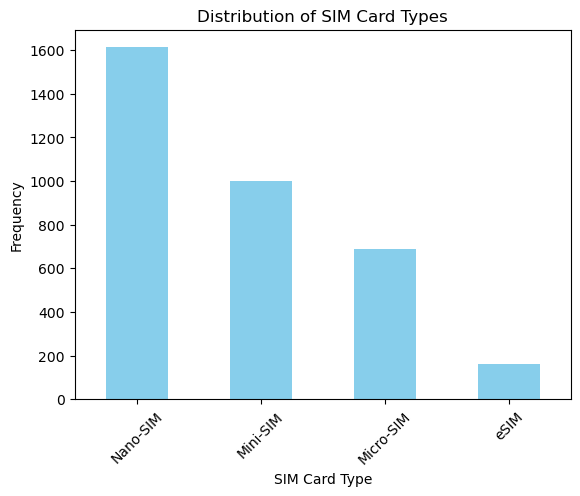

In [5]:
sim_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of SIM Card Types')
plt.xlabel('SIM Card Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

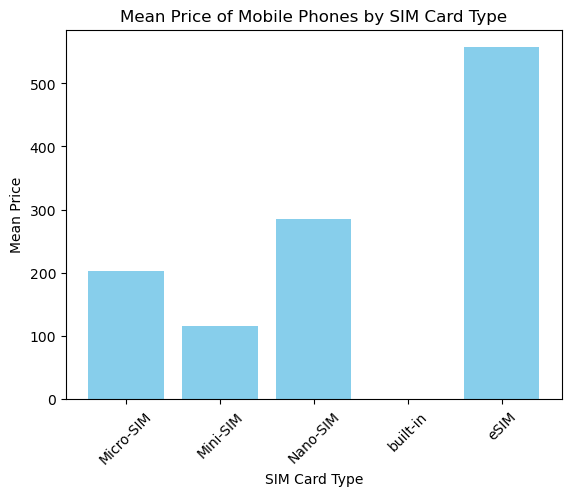

In [6]:
mean_price_by_sim = df.groupby('SIM')['Price'].mean().reset_index()

plt.bar(mean_price_by_sim['SIM'], mean_price_by_sim['Price'], color='skyblue')
plt.title('Mean Price of Mobile Phones by SIM Card Type')
plt.xlabel('SIM Card Type')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)

plt.show()

#### why ANOVA test?
Because it allows us to compare the means of multiple groups which is useful when dealing with more than 2 groups

In [7]:
df_anova = df[['SIM', 'Price', 'Display Size']]
df_anova = df_anova.rename(columns={'Display Size': 'Display_Size'})
df_anova = df_anova.dropna()

df_anova.head()

,SIM,Price,Display_Size
0,Nano-SIM,100.0,5.5
1,Nano-SIM,110.0,6.1
2,Nano-SIM,60.0,5.0
3,Nano-SIM,330.0,6.52
4,Nano-SIM,130.0,6.52


ANOVA results for screen size:
                              sum_sq      df           F         PR(>F)
SIM                     3.242611e+07     3.0  281.470220  2.028749e-163
Display_Size_Class      5.991467e+06     1.0  156.024238   4.743898e-35
SIM:Display_Size_Class  1.285631e+06     3.0   11.159738   2.753603e-07
Residual                1.324062e+08  3448.0         NaN            NaN


<Axes: xlabel='SIM', ylabel='Price'>

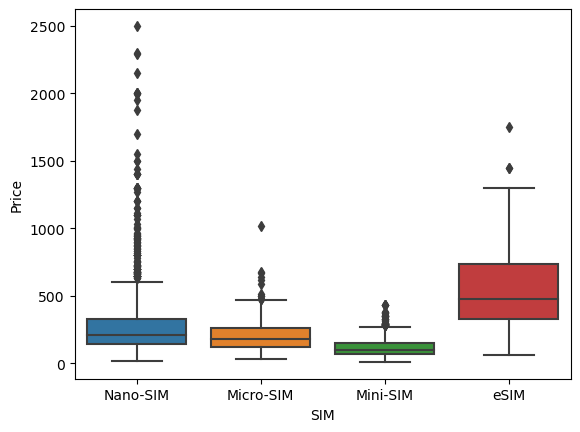

In [8]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns

threshold = 7.0
df_anova['Display_Size'] = pd.to_numeric(df_anova['Display_Size'])
df_anova['Display_Size_Class'] = df_anova['Display_Size'].apply(lambda x: 'small' if x < threshold else 'large')

formula = 'Price ~ SIM * Display_Size_Class'
model = ols(formula, data=df_anova).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA results for screen size:")
print(anova_table)

sns.boxplot(x='SIM', y='Price', data=df_anova)

- **Effect of SIM:**
  - Significant difference in mean prices based on SIM card type (p < 0.05).

- **Effect of Screen Size (Display_Size):**
  - Significant difference in mean prices based on screen size (p < 0.05).

- **Interaction Effect between SIM and Screen Size (SIM:Display_Size):**
  - Significant interaction effect between SIM card type and screen size on prices (p < 0.05).

# Hypothesis test 2

In [9]:
df['ppi'].isnull().sum()
df_cleaned = df.dropna(subset=['ppi'])
df_cleaned.loc[:, 'Display Size'] = df_cleaned['Display Size'].astype(float)

In [10]:
small_screen = df_cleaned[df_cleaned['Display Size'] < 7.0]['ppi']
large_screen = df_cleaned[df_cleaned['Display Size'] >= 7.0]['ppi']

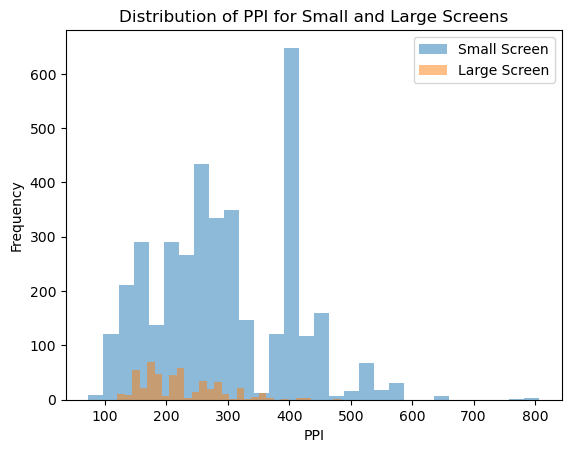

In [11]:
fig, ax = plt.subplots()

ax.hist(small_screen, alpha=0.5, label='Small Screen', bins=30)
ax.hist(large_screen, alpha=0.5, label='Large Screen', bins=30)

ax.set_xlabel('PPI')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of PPI for Small and Large Screens')

ax.legend()

plt.show()

#### Shapiro and D'Agostino for testing the normality

In [12]:
from scipy.stats import shapiro, normaltest

_, p_value = shapiro(small_screen)

if p_value < 0.05:
    print("Small screen distribution is not normal.")
else:
    print("Small screen distribution is normal.")

_, p_value = shapiro(large_screen)

if p_value < 0.05:
    print("Large screen distribution is not normal.")
else:
    print("Large screen distribution is normal.")

print()

_, p_value = normaltest(small_screen)

if p_value < 0.05:
    print("Small screen distribution is not normal.")
else:
    print("Small screen distribution is normal.")


_, p_value = normaltest(large_screen)

if p_value < 0.05:
    print("Large screen distribution is not normal.")
else:
    print("Large screen distribution is normal.")


Small screen distribution is not normal.
Large screen distribution is not normal.

Small screen distribution is not normal.
Large screen distribution is not normal.


#### U-TEST

In [13]:
from scipy.stats import mannwhitneyu

_, p_value = mannwhitneyu(small_screen, large_screen)

print("Mann-Whitney U Test:")
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between mean of ppi density.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between mean of ppi density.")

Mann-Whitney U Test:
p-value: 1.7211994246852452e-44
Reject the null hypothesis: There is a significant difference between mean of ppi density.


# Hypothesis Test 3

In [14]:
df_cleaned = df.dropna(subset=['OS', 'Weight'])

In [15]:
weight_android = df_cleaned[df_cleaned['OS'].str.contains('Android', case=False)]['Weight']
weight_ios = df_cleaned[df_cleaned['OS'].str.contains('iOS', case=False)]['Weight']

#### Testing the Normality

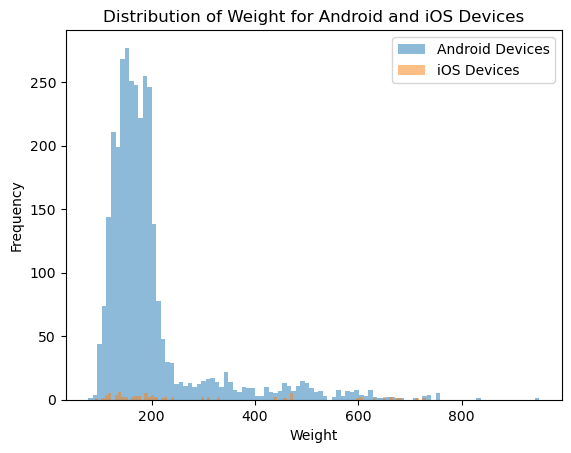

In [16]:
fig, ax = plt.subplots()

ax.hist(weight_android, alpha=0.5, label='Android Devices', bins=100)
ax.hist(weight_ios, alpha=0.5, label='iOS Devices', bins=100)

ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Weight for Android and iOS Devices')
ax.legend()

plt.show()

In [17]:
from scipy.stats import shapiro, normaltest

_, p_value = shapiro(weight_android)
if p_value < 0.05:
    print("Weight distribution for Android devices is not normal.")
else:
    print("Weight distribution for Android devices is normal.")

_, p_value = shapiro(weight_ios)
if p_value < 0.05:
    print("Weight distribution for iOS devices is not normal.")
else:
    print("Weight distribution for iOS devices is normal.")

print()

_, p_value = normaltest(weight_android)
if p_value < 0.05:
    print("Weight distribution for Android devices is not normal.")
else:
    print("Weight distribution for Android devices is normal.")

_, p_value = normaltest(weight_ios)
if p_value < 0.05:
    print("Weight distribution for iOS devices is not normal.")
else:
    print("Weight distribution for iOS devices is normal.")


Weight distribution for Android devices is not normal.
Weight distribution for iOS devices is not normal.

Weight distribution for Android devices is not normal.
Weight distribution for iOS devices is not normal.


#### U-TEST

In [18]:
from scipy.stats import mannwhitneyu

_, p_value = mannwhitneyu(weight_android, weight_ios)

print("Mann-Whitney U Test:")
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the weights of Android and iOS devices.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the weights of Android and iOS devices.")

Mann-Whitney U Test:
p-value: 0.0030965836651082193
Reject the null hypothesis: There is a significant difference in the weights of Android and iOS devices.


# Hypothesis test 4

In [19]:
df_cleaned = df.dropna(subset=['battery_capacity', 'Display Size'])
df_cleaned.loc[:, 'Display Size'] = df_cleaned['Display Size'].astype(float)

In [20]:
apple_small_screen = df_cleaned[(df_cleaned['brand'] == 'apple') & (df_cleaned['Display Size'] < 7.0)]
apple_large_screen = df_cleaned[(df_cleaned['brand'] == 'apple') & (df_cleaned['Display Size'] >= 7.0)]

samsung_small_screen = df_cleaned[(df_cleaned['brand'] == 'samsung') & (df_cleaned['Display Size'] < 7.0)]
samsung_large_screen = df_cleaned[(df_cleaned['brand'] == 'samsung') & (df_cleaned['Display Size'] >= 7.0)]

xiaomi_small_screen = df_cleaned[(df_cleaned['brand'] == 'xiaomi') & (df_cleaned['Display Size'] < 7.0)]
xiaomi_large_screen = df_cleaned[(df_cleaned['brand'] == 'xiaomi') & (df_cleaned['Display Size'] >= 7.0)]

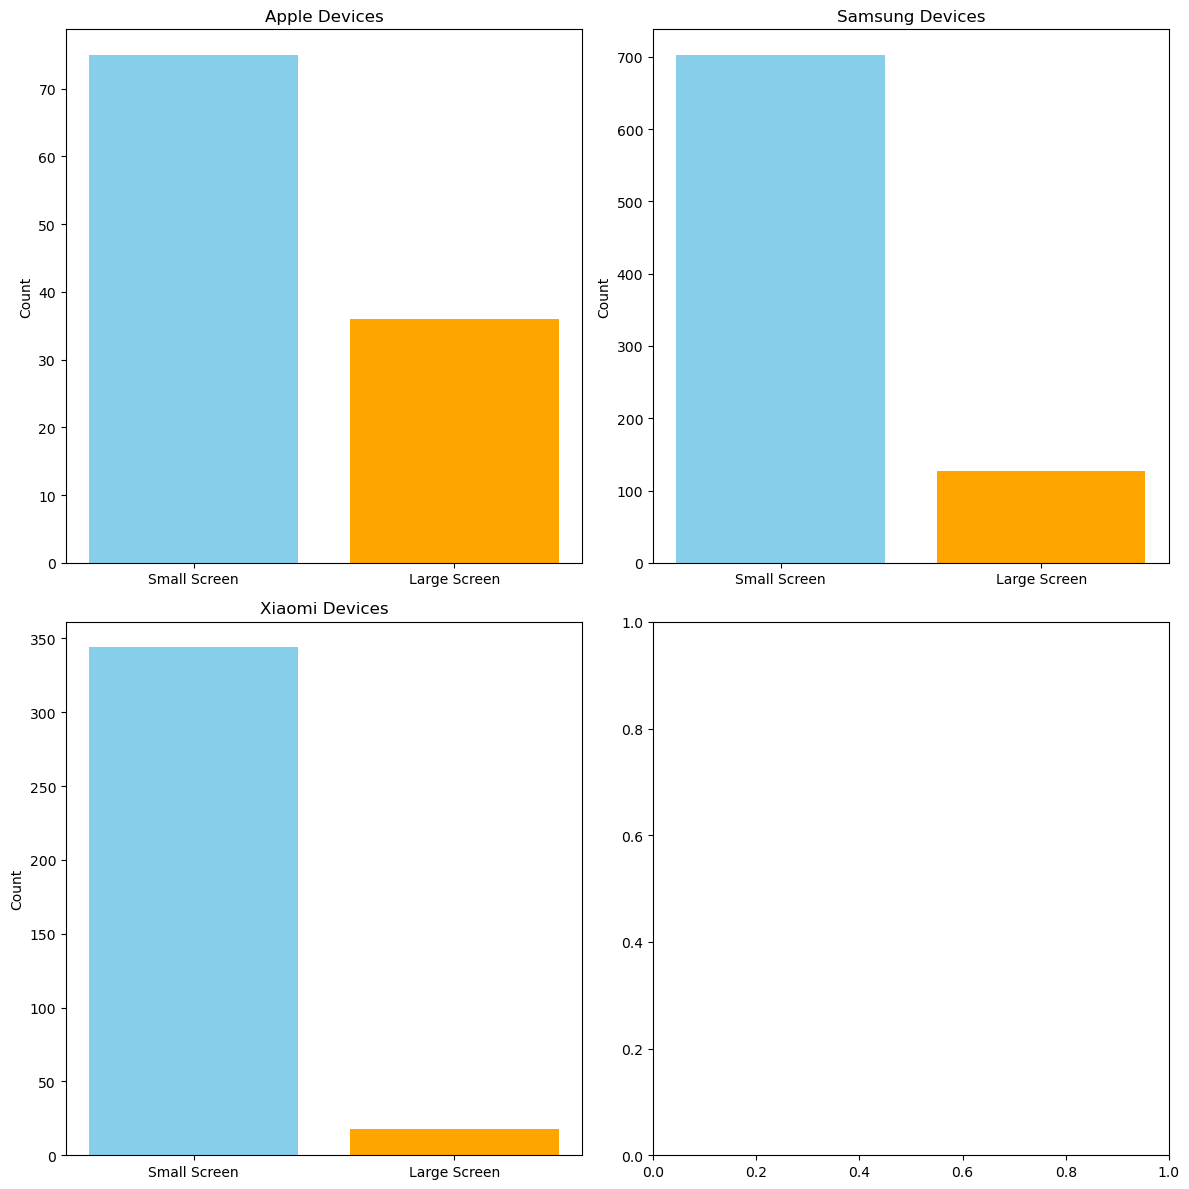

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].bar(['Small Screen', 'Large Screen'], [len(apple_small_screen), len(apple_large_screen)], color=['skyblue', 'orange'])
axs[0, 0].set_title('Apple Devices')
axs[0, 0].set_ylabel('Count')

axs[0, 1].bar(['Small Screen', 'Large Screen'], [len(samsung_small_screen), len(samsung_large_screen)], color=['skyblue', 'orange'])
axs[0, 1].set_title('Samsung Devices')
axs[0, 1].set_ylabel('Count')

axs[1, 0].bar(['Small Screen', 'Large Screen'], [len(xiaomi_small_screen), len(xiaomi_large_screen)], color=['skyblue', 'orange'])
axs[1, 0].set_title('Xiaomi Devices')
axs[1, 0].set_ylabel('Count')

plt.tight_layout()

plt.show()

ANOVA results for battery capacity:
                                sum_sq      df           F         PR(>F)
brand                     8.181723e+08     2.0  173.068847   2.382387e-67
Display_Size_Class        2.338984e+09     1.0  989.535539  6.942129e-162
brand:Display_Size_Class  1.347919e+08     2.0   28.512666   7.613802e-13
Residual                  3.065744e+09  1297.0         NaN            NaN


<Axes: xlabel='brand', ylabel='battery_capacity'>

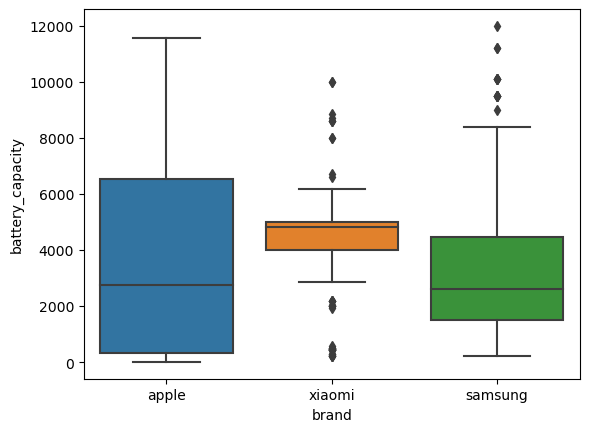

In [22]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

threshold = 7.0

selected_brands = ['apple', 'samsung', 'xiaomi']
df_anova = df_cleaned[df_cleaned['brand'].isin(selected_brands)][['brand', 'Display Size', 'battery_capacity']].copy()
df_anova = df_anova.rename(columns={'Display Size': 'Display_Size'})
df_anova['Display_Size_Class'] = df_anova['Display_Size'].apply(lambda x: 'small' if x < threshold else 'large')

formula = 'battery_capacity ~ brand * Display_Size_Class'
model = ols(formula, data=df_anova).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA results for battery capacity:")
print(anova_table)

sns.boxplot(x='brand', y='battery_capacity', data=df_anova)

- **Effect of SIM:**
  - There is a significant difference in mean prices based on SIM card type (p < 0.05).

- **Effect of Screen Size (Display_Size):**
  - There is a significant difference in mean prices based on screen size (p < 0.05).

- **Interaction Effect between SIM and Screen Size (SIM:Display_Size):**
  - There is a significant interaction effect between SIM card type and screen size on prices (p < 0.05).

In [23]:
from scipy.stats import f_oneway

apple_small_battery = apple_small_screen['battery_capacity']
apple_large_battery = apple_large_screen['battery_capacity']

samsung_small_battery = samsung_small_screen['battery_capacity']
samsung_large_battery = samsung_large_screen['battery_capacity']

xiaomi_small_battery = xiaomi_small_screen['battery_capacity']
xiaomi_large_battery = xiaomi_large_screen['battery_capacity']

_, p_value = f_oneway(apple_small_battery, apple_large_battery,
                               samsung_small_battery, samsung_large_battery,
                               xiaomi_small_battery, xiaomi_large_battery)


print("ANOVA Test for battery_capacity:")
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean of battery capacity.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean of battery capacity.")

ANOVA Test for battery_capacity:
p-value: 1.2050979537619009e-186
Reject the null hypothesis: There is a significant difference in mean of battery capacity.


# Hypothesis Test 5

In [24]:
df_cleaned = df.dropna(subset=['Price', 'Display Size'])
df_cleaned.loc[:, 'Display Size'] = df_cleaned['Display Size'].astype(float)

In [25]:
apple_small_screen = df_cleaned[(df_cleaned['brand'] == 'apple') & (df_cleaned['Display Size'] < 7.0)]
apple_large_screen = df_cleaned[(df_cleaned['brand'] == 'apple') & (df_cleaned['Display Size'] >= 7.0)]

samsung_small_screen = df_cleaned[(df_cleaned['brand'] == 'samsung') & (df_cleaned['Display Size'] < 7.0)]
samsung_large_screen = df_cleaned[(df_cleaned['brand'] == 'samsung') & (df_cleaned['Display Size'] >= 7.0)]

xiaomi_small_screen = df_cleaned[(df_cleaned['brand'] == 'xiaomi') & (df_cleaned['Display Size'] < 7.0)]
xiaomi_large_screen = df_cleaned[(df_cleaned['brand'] == 'xiaomi') & (df_cleaned['Display Size'] >= 7.0)]

ANOVA results for price:
                                sum_sq      df          F        PR(>F)
brand                     2.100187e+07     2.0  41.948882  2.324193e-18
Display_Size_Class        2.934484e+06     1.0  11.722602  6.374148e-04
brand:Display_Size_Class  4.944092e+06     2.0   9.875268  5.555229e-05
Residual                  3.134094e+08  1252.0        NaN           NaN


<Axes: xlabel='brand', ylabel='Price'>

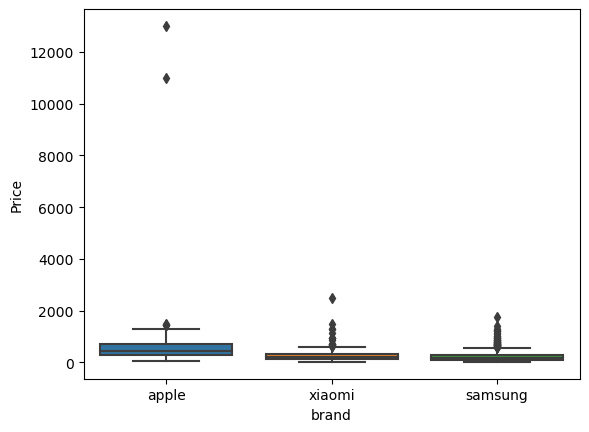

In [26]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns

threshold = 7.0

selected_brands = ['apple', 'samsung', 'xiaomi']
df_anova = df_cleaned[df_cleaned['brand'].isin(selected_brands)][['brand', 'Display Size', 'Price']].copy()
df_anova = df_anova.rename(columns={'Display Size': 'Display_Size'})
df_anova['Display_Size_Class'] = df_anova['Display_Size'].apply(lambda x: 'small' if x < threshold else 'large')

formula = 'Price ~ brand * Display_Size_Class'
model = ols(formula, data=df_anova).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA results for price:")
print(anova_table)

sns.boxplot(x='brand', y='Price', data=df_anova)

- **Effect of Brand:**
  - There is a significant difference in mean prices based on brand (p < 0.05).

- **Effect of Screen Size (Display_Size_Class):**
  - There is a significant difference in mean prices based on screen size (p < 0.05).

- **Interaction Effect between Brand and Screen Size (brand:Display_Size_Class):**
  - There is a significant interaction effect between brand and screen size on prices (p < 0.05).

In [27]:
from scipy.stats import f_oneway

apple_small_price = apple_small_screen['Price']
apple_large_price = apple_large_screen['Price']

samsung_small_price = samsung_small_screen['Price']
samsung_large_price = samsung_large_screen['Price']

xiaomi_small_price = xiaomi_small_screen['Price']
xiaomi_large_price = xiaomi_large_screen['Price']

_, p_value = f_oneway(apple_small_price, apple_large_price,
                               samsung_small_price, samsung_large_price,
                               xiaomi_small_price, xiaomi_large_price)


print("ANOVA Test for Price:")
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean price.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean price.")


ANOVA Test for Price:
p-value: 9.973605206853006e-25
Reject the null hypothesis: There is a significant difference in the mean price.


# Hypothesis test 6

In [28]:
df_cleaned = df.dropna(subset=['Weight', 'Display Size'])
df_cleaned.loc[:, 'Display Size'] = df_cleaned['Display Size'].astype(float)

In [29]:
small_screen = df_cleaned[df_cleaned['Display Size'] < 7.0]['Weight']
large_screen = df_cleaned[df_cleaned['Display Size'] >= 7.0]['Weight']

#### Normality testing

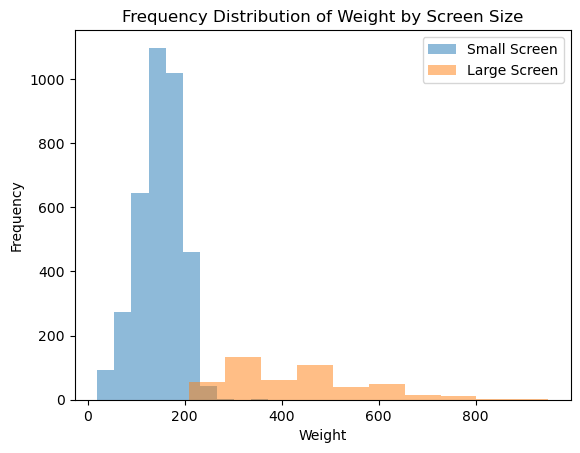

In [30]:
fig, ax = plt.subplots()

ax.hist(small_screen, alpha=0.5, label='Small Screen')
ax.hist(large_screen, alpha=0.5, label='Large Screen')

ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of Weight by Screen Size')

ax.legend()

plt.show()


In [31]:
from scipy.stats import shapiro, normaltest


_, p_value_shapiro_small = shapiro(small_screen)
if p_value_shapiro_small < 0.05:
    print("Weight distribution for small screen is not normal.")
else:
    print("Weight distribution for small screen is normal.")


_, p_value_shapiro_large = shapiro(large_screen)
if p_value_shapiro_large < 0.05:
    print("Weight distribution for large screen is not normal.")
else:
    print("Weight distribution for large screen is normal.")

print()


_, p_value_dagostino_small = normaltest(small_screen)
if p_value_dagostino_small < 0.05:
    print("Weight distribution for small screen is not normal.")
else:
    print("Weight distribution for small screen is normal.")

_, p_value_dagostino_large = normaltest(large_screen)
if p_value_dagostino_large < 0.05:
    print("Weight distribution for large screen is not normal.")
else:
    print("Weight distribution for large screen is normal.")


Weight distribution for small screen is not normal.
Weight distribution for large screen is not normal.

Weight distribution for small screen is not normal.
Weight distribution for large screen is not normal.


#### U-TEST

In [32]:
from scipy.stats import mannwhitneyu

_, p_value = mannwhitneyu(small_screen, large_screen)


print("Mann-Whitney U Test:")
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the weights of smartphones with small and large screen sizes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the weights of smartphones with small and large screen sizes.")

Mann-Whitney U Test:
p-value: 9.068143379577567e-276
Reject the null hypothesis: There is a significant difference in the weights of smartphones with small and large screen sizes.
